In [ ]:
!pip install scikit-surprise
from surprise import SVD
from surprise import Reader,Dataset, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 11.8MB 298kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617542 sha256=6e4f3f01b73db718844129f8486dbd8e3c31b30aa60426ff0dbc60c6566ece3f
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise
Mounted at /content/drive


In [ ]:
reader = Reader(line_format='user item rating timestamp', sep=',' ,skip_lines=1, rating_scale=(1, 5))
data = Dataset.load_from_file('/content/drive/My Drive/CAP 5610 Project data/ratings_small.csv', reader=reader)

In [ ]:
# algo = SVD()
# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
### Question 3(c)

### PMF
PMF_algo = SVD(biased=False)
cross_validate(PMF_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### User based Collaborative Filtering
UBCF_algo = KNNBasic(sim_options = {'user_based': True })
cross_validate(UBCF_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Item based Collaborative Filtering
IBCF_algo = KNNBasic(sim_options = {'user_based': False })
cross_validate(IBCF_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0106  1.0026  1.0135  1.0091  1.0058  1.0083  0.0038  
MAE (testset)     0.7801  0.7726  0.7823  0.7791  0.7765  0.7781  0.0033  
Fit time          4.66    4.66    4.63    4.62    4.64    4.64    0.02    
Test time         0.22    0.14    0.14    0.20    0.20    0.18    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9698  0.9709  0.9745  0.9591  0.9681  0.9685  0.0051

{'fit_time': (4.255367755889893,
  4.234874486923218,
  3.7195637226104736,
  3.704396963119507,
  3.8027806282043457),
 'test_mae': array([0.72492775, 0.72360203, 0.7221366 , 0.71734808, 0.71708492]),
 'test_rmse': array([0.94079407, 0.93610496, 0.93673203, 0.93100824, 0.92923155]),
 'test_time': (7.137237548828125,
  7.214548826217651,
  7.375168800354004,
  7.110396862030029,
  7.159691333770752)}

In [ ]:
### Quesion 3(e)
###  User based Collaborative Filtering
### Cosine similarity impact
algo = KNNBasic(sim_options = {'user_based': True,'name': 'cosine'})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

###  MSD (Mean Squared Difference) similarity impact
algo = KNNBasic(sim_options = {'user_based': True,'name': 'MSD'})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Pearson similarity impact 
algo = KNNBasic(sim_options = {'user_based': True, 'name': 'pearson'})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0016  0.9893  0.9877  0.9947  0.9888  0.9924  0.0052  
MAE (testset)     0.7755  0.7658  0.7617  0.7688  0.7628  0.7669  0.0050  
Fit time          0.63    0.64    0.64    0.64    0.70    0.65    0.03    
Test time         1.78    1.66    1.55    1.54    1.49    1.60    0.10    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

{'test_rmse': array([0.99969374, 0.9926289 , 0.99991758, 0.99887659, 0.99757851]),
 'test_mae': array([0.77316314, 0.76784504, 0.77235645, 0.77682429, 0.7743392 ]),
 'fit_time': (0.9312136173248291,
  0.8580303192138672,
  0.8189263343811035,
  0.8122432231903076,
  0.7966809272766113),
 'test_time': (1.542497158050537,
  1.5705416202545166,
  1.4018256664276123,
  1.5189385414123535,
  1.558164358139038)}

In [ ]:
### Quesion 3(e)
### Item based Collaborative Filtering
### Cosine similarity impact
algo = KNNBasic(sim_options = {'user_based': False,'name': 'cosine'})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

###  MSD (Mean Squared Difference) similarity impact
algo = KNNBasic(sim_options = {'user_based': False,'name': 'MSD'})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Pearson similarity impact 
algo = KNNBasic(sim_options = {'user_based': False,'name': 'pearson'})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9952  0.9901  1.0019  0.9941  1.0000  0.9963  0.0042  
MAE (testset)     0.7746  0.7711  0.7775  0.7732  0.7777  0.7748  0.0025  
Fit time          13.35   13.15   13.70   13.46   13.45   13.42   0.18    
Test time         7.09    7.03    7.05    7.00    7.11    7.06    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

{'fit_time': (18.329800605773926,
  18.601910829544067,
  18.13924813270569,
  18.647855758666992,
  18.19713592529297),
 'test_mae': array([0.77474377, 0.76693771, 0.7652618 , 0.76738072, 0.76810767]),
 'test_rmse': array([0.99736161, 0.98726734, 0.98897214, 0.98630748, 0.98913464]),
 'test_time': (6.8784096240997314,
  6.998202085494995,
  7.354374408721924,
  6.984931945800781,
  7.2579216957092285)}

In [ ]:
### Quesion 3(f)
### The impacts of number of neighbors on User based Collaborative Filtering and Item based Collaborative Filtering

UBCF_RMSE = []
UBCF_MAE = []
IBCF_RMSE = []
IBCF_MAE = []

for k in range(1,102,2):
    print(k)
    algo_user_CF = KNNBasic(k=k, sim_options={'user_based': True}) 
    evaluation_user = cross_validate(algo_user_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    UBCF_RMSE.append(evaluation_user['test_rmse'].sum()/5)
    UBCF_MAE.append(evaluation_user['test_mae'].sum()/5)
    algo_item_CF = KNNBasic(k=k, sim_options={'user_based': False})
    evaluation_item = cross_validate(algo_item_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    IBCF_RMSE.append(evaluation_item['test_rmse'].sum()/5)
    IBCF_MAE.append(evaluation_item['test_mae'].sum()/5)
    
print(UBCF_RMSE)
print(UBCF_MAE)
print(IBCF_RMSE)
print(IBCF_MAE)

1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2101  1.2198  1.2062  1.2120  1.2085  1.2113  0.0046  
MAE (testset)     0.9004  0.9075  0.8997  0.9037  0.9030  0.9029  0.0028  
Fit time          0.13    0.15    0.16    0.15    0.16    0.15    0.01    
Test time         0.90    1.00    0.88    0.88    1.02    0.93    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

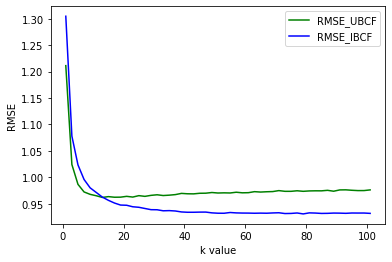

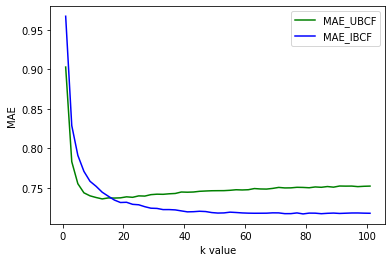

Best k-value for UBCF:  6
Best k-value for IBCF:  39


In [ ]:
X = range(1,102,2)
plt.figure(3)
plt.plot(X, UBCF_RMSE, color='green', linestyle='solid', linewidth=1.5, label='RMSE_UBCF') 
plt.plot(X, IBCF_RMSE, color='blue', linestyle='solid', linewidth=1.5, label='RMSE_IBCF')
plt.legend()
plt.xlabel('k value')
plt.ylabel('RMSE')

plt.figure(4)
plt.plot(X, UBCF_MAE, color='green', linestyle='solid', linewidth=1.5, label='MAE_UBCF')
plt.plot(X, IBCF_MAE, color='blue', linestyle='solid', linewidth=1.5, label='MAE_IBCF')
plt.legend()
plt.xlabel('k value')
plt.ylabel('MAE')
plt.show()

### Question 3(g)
print("Best k-value for UBCF: ", UBCF_RMSE.index(min(UBCF_RMSE)))
print("Best k-value for IBCF: ", IBCF_RMSE.index(min(IBCF_RMSE)))